<a href="https://colab.research.google.com/github/anujapande2001/MLProjects/blob/main/Avacado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AVACADO PRICE PREDICTION**

# **1. Introduction**


**Your client for this project is a major Avocado Producer....**


*  Their avocados are sourced from over 1000 growers owning over 65,000 acres across California, Mexico, Chile, and Peru.
*  With generations of experience growing, packing, and shipping avocados, they have a deep understanding of the avocado industry.
* Their aim is to source quality fruit that’s sustainably grown and handled in the most efficient, shortest supply route possible.

**Current Scenario:**

* Avocado prices have rocketed in recent years by up to 129%, with the average national price in the US of a single Hass avocado reaching $2.10 in 2019, almost doubling in just one year.

* Due to this uncertainty in the prices, the company is not able to sell their produce at the optimal price.






# **2. Problem Statement**
**The current process suffers from the following problems:**

*   The price of avocado is dependent on global demands and seasonal production.
*   Due to these reasons, it is quite difficult to know for certain the price in the future.

The company has hired you as data science consultants. They want to automate the process of assigning the drug according to their health report.

**Your Role**
*  You are given a dataset containing the weekly retail scan data of avocadoes.
*  Your task is to build a **REGRESSION** model using the dataset.
*  Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.


# **3. Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")


# **4. Data Acquisition & Description**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Avocado/avocado_train.csv")
dataValidation=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Avocado/avocado_test.csv")
dataValidationId=dataValidation.Id
data.head()



,Id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,14761,2017-08-20,1.86,2584.08,61.21,143.82,0.00,2379.05,2379.05,0.00,0.0,organic,2017,Albany
1,6843,2017-11-12,1.14,100811.00,3181.00,43510.00,86.00,54034.00,11788.00,42246.00,0.0,conventional,2017,Louisville
2,7306,2017-02-12,0.95,430096.94,242212.80,81697.52,264.25,105922.37,48557.37,57365.00,0.0,conventional,2017,Orlando
3,12329,2016-05-22,1.71,5433.16,437.48,2422.71,544.63,2028.34,2021.67,6.67,0.0,organic,2016,Charlotte
4,12036,2016-01-10,1.66,5614.09,2123.47,2121.26,0.00,1369.36,392.02,977.34,0.0,organic,2016,Atlanta


### **4.1 Data Information**

- In this section we will see the **information about the types of the features**.




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14599 entries, 0 to 14598
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            14599 non-null  int64  
 1   Date          14599 non-null  object 
 2   AveragePrice  14599 non-null  float64
 3   Total Volume  14599 non-null  float64
 4   4046          14599 non-null  float64
 5   4225          14599 non-null  float64
 6   4770          14599 non-null  float64
 7   Total Bags    14599 non-null  float64
 8   Small Bags    14599 non-null  float64
 9   Large Bags    14599 non-null  float64
 10  XLarge Bags   14599 non-null  float64
 11  type          14599 non-null  object 
 12  year          14599 non-null  int64  
 13  region        14599 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.6+ MB


### **4.2 Data Description**

- In this section we will get **information about the data** and see some observations.

In [ ]:
data.describe()

,Id,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,14599.000000,14599.000000,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,14599.000000,14599.000000
mean,9116.120899,1.409168,8.136614e+05,2.787616e+05,2.835157e+05,2.175564e+04,2.296264e+05,1.746354e+05,5.199545e+04,2995.622236,2016.146174
std,5279.989902,0.404518,3.292013e+06,1.206792e+06,1.150215e+06,1.025608e+05,9.429775e+05,7.139212e+05,2.343441e+05,17313.445157,0.937565
min,2.000000,0.440000,3.855500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,4538.500000,1.100000,1.080823e+04,8.493600e+02,3.018255e+03,0.000000e+00,5.040900e+03,2.828890e+03,1.314550e+02,0.000000,2015.000000
50%,9125.000000,1.370000,1.070186e+05,8.425390e+03,2.890747e+04,1.807200e+02,3.960296e+04,2.631176e+04,2.621750e+03,0.000000,2016.000000
75%,13698.500000,1.670000,4.261702e+05,1.087822e+05,1.451605e+05,6.136665e+03,1.096453e+05,8.300046e+04,2.151112e+04,127.940000,2017.000000
max,18249.000000,3.250000,6.250565e+07,2.162018e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# **5. Data Pre-Processing**

### **5.1 Data Pre-Profiling**


**Check null value or any other inconsistent value in column**

In [ ]:
print((data=="").sum(), "\n")

Id              0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64 



In [ ]:
print(data.isna().sum(), "\n")


Id              0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64 



In [ ]:
print((data=="Unknown").sum(), "\n")


Id              0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64 



In [ ]:
print((data==0).sum(), "\n")

Id                 0
Date               0
AveragePrice       0
Total Volume       0
4046             192
4225              45
4770            4370
Total Bags        13
Small Bags       129
Large Bags      1871
XLarge Bags     9649
type               0
year               0
region             0
dtype: int64 



In [ ]:
data.fruity.value_counts()

0    38
1    30
Name: fruity, dtype: int64

In [ ]:
data.duplicated().any()

False

In [ ]:
catCol=["competitorname"]
for col in catCol:
  print(data[col].value_counts())



Sugar Daddy            1
Baby Ruth              1
Strawberry bon bons    1
Trolli Sour Bites      1
Twizzlers              1
                      ..
Whoppers               1
Root Beer Barrels      1
Peanut butter M&MÕs    1
Milky Way Midnight     1
Nestle Smarties        1
Name: competitorname, Length: 68, dtype: int64


### **5.2 Data Cleaning**

- N/A

### **5.3 Data Post-Profiling**

- Next, we will generate and verify the report to identify any new observation that can help us in further analysis.

# **6. Exploratory Data Analysis**

In [ ]:
data.describe().columns


Index(['Id', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')

### **Check distribution of numerical features and Outliers**

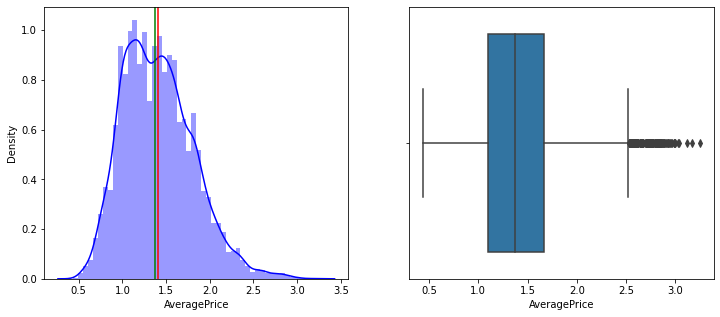

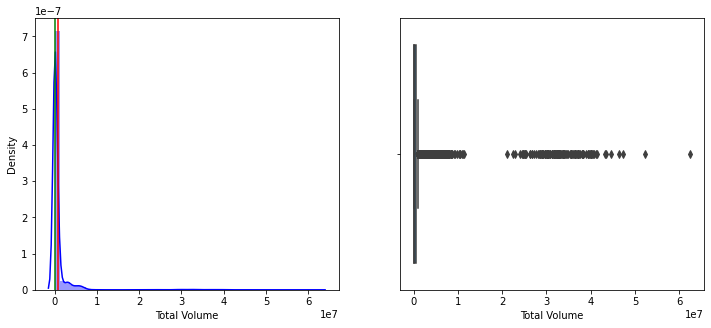

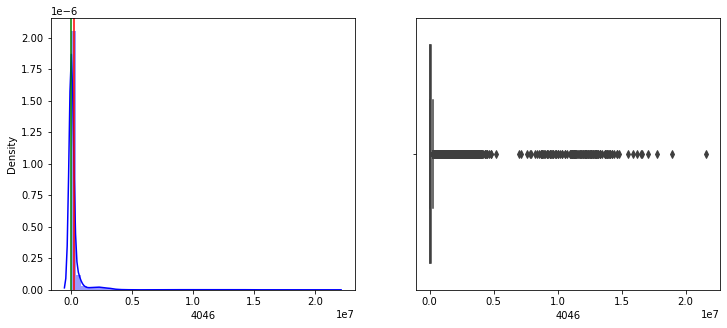

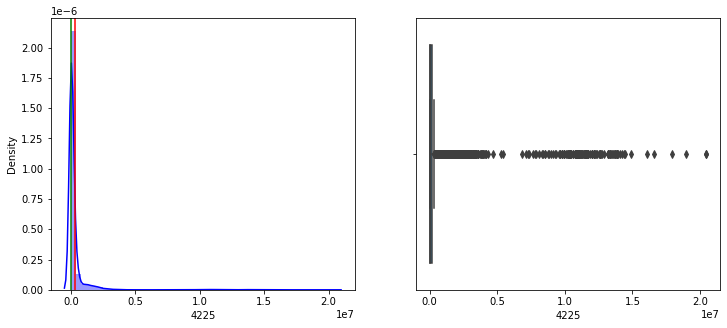

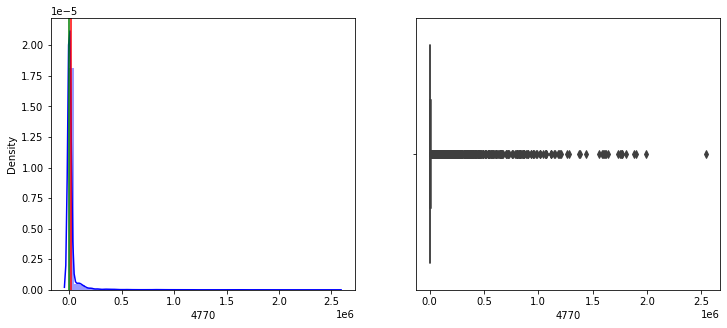

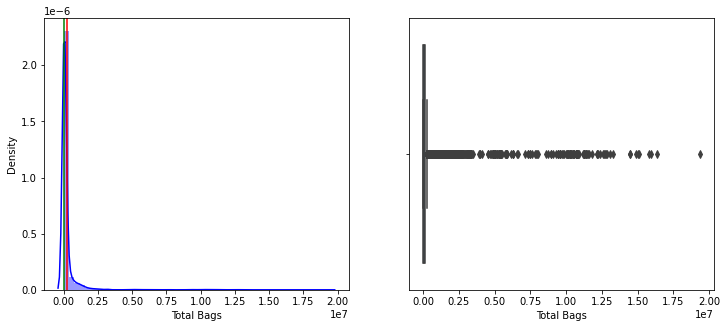

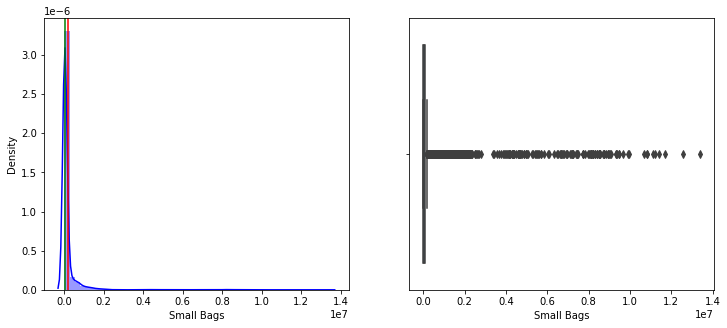

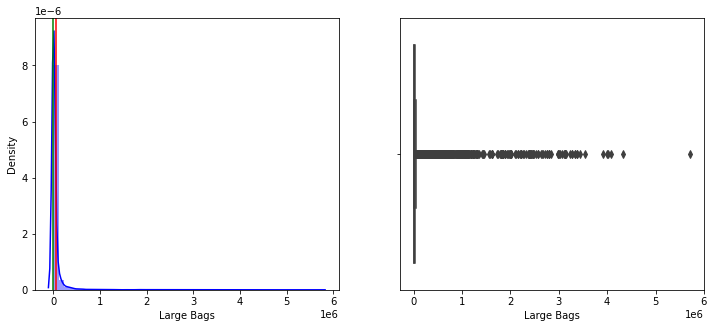

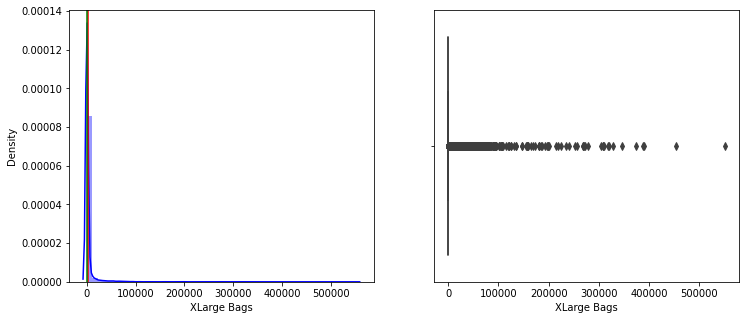

In [ ]:
contColumn=['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']


for col in contColumn:  
  fig=plt.figure(figsize=[12,5])
  plt.subplot(1,2,1)
  sns.distplot(data[col], color="b")
  plt.axvline(data[col].mean(), color="r")
  plt.axvline(data[col].median(), color="g")
  plt.subplot(1,2,2)
  sns.boxplot(data[col])


  

### **Checking relationship between cont features and target variable**

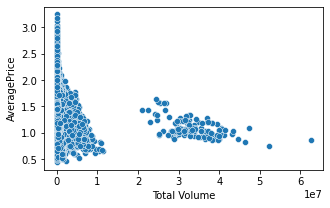

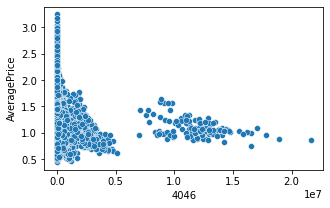

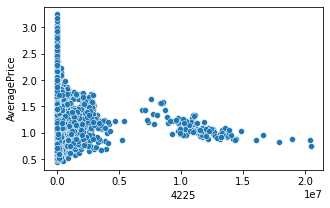

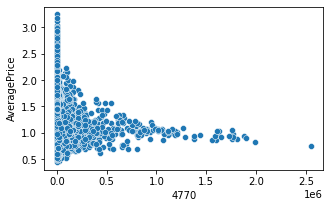

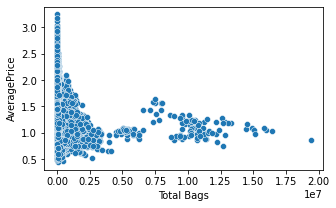

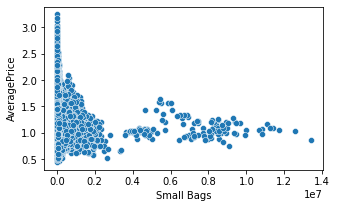

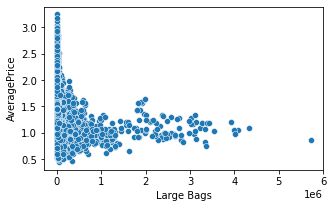

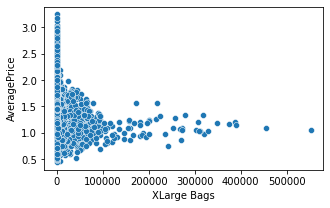

In [ ]:
for col in contColumn[1:]:
  fig=plt.figure(figsize=[5,3])
  sns.scatterplot(x=col,y="AveragePrice",data=data)

In [ ]:
data.region.unique()

array(['Albany', 'Louisville', 'Orlando', 'Charlotte', 'Atlanta',
       'SouthCarolina', 'MiamiFtLauderdale', 'Chicago', 'Columbus',
       'Houston', 'RichmondNorfolk', 'NewOrleansMobile', 'NewYork',
       'California', 'SouthCentral', 'BaltimoreWashington', 'Boston',
       'Tampa', 'LosAngeles', 'Boise', 'Roanoke', 'Southeast', 'Plains',
       'Pittsburgh', 'West', 'NorthernNewEngland', 'Indianapolis',
       'Jacksonville', 'Midsouth', 'LasVegas', 'GreatLakes',
       'RaleighGreensboro', 'StLouis', 'TotalUS', 'WestTexNewMexico',
       'HarrisburgScranton', 'Philadelphia', 'Seattle', 'Northeast',
       'DallasFtWorth', 'BuffaloRochester', 'SanFrancisco', 'GrandRapids',
       'Denver', 'HartfordSpringfield', 'Syracuse', 'Portland', 'Spokane',
       'PhoenixTucson', 'CincinnatiDayton', 'Detroit', 'Sacramento',
       'Nashville', 'SanDiego'], dtype=object)

### **Checking relationship between cat features and target variable**

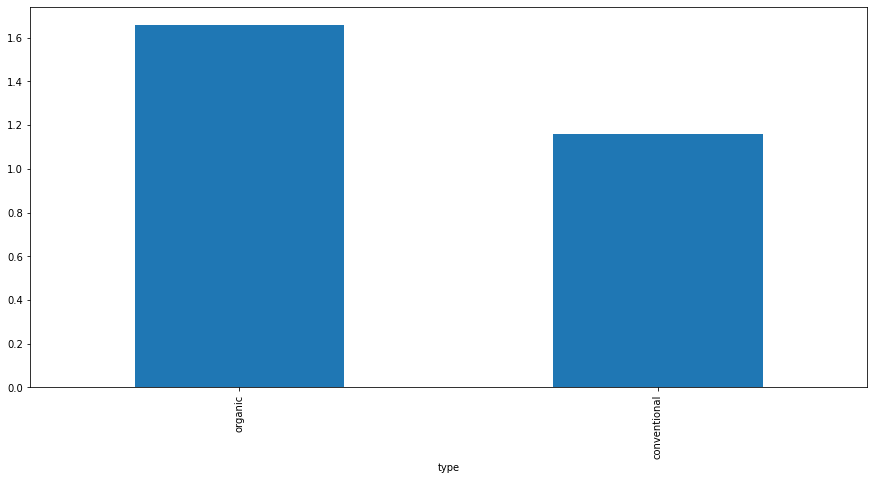

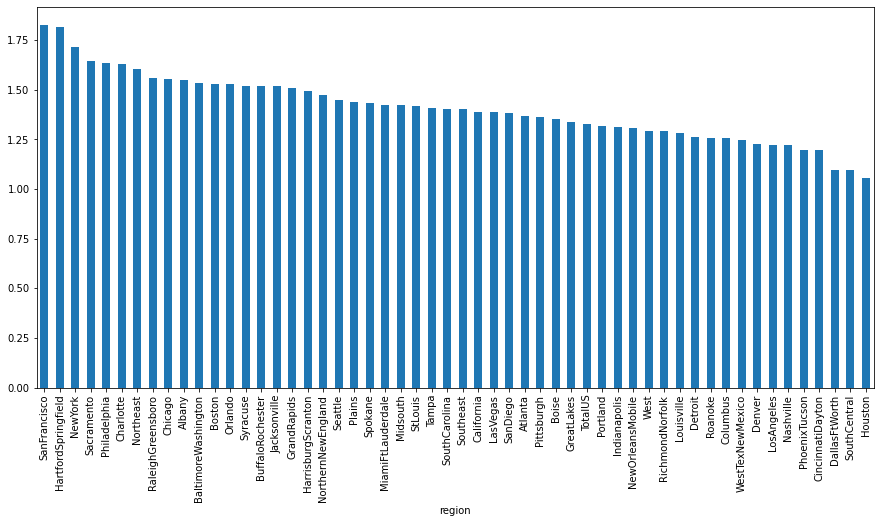

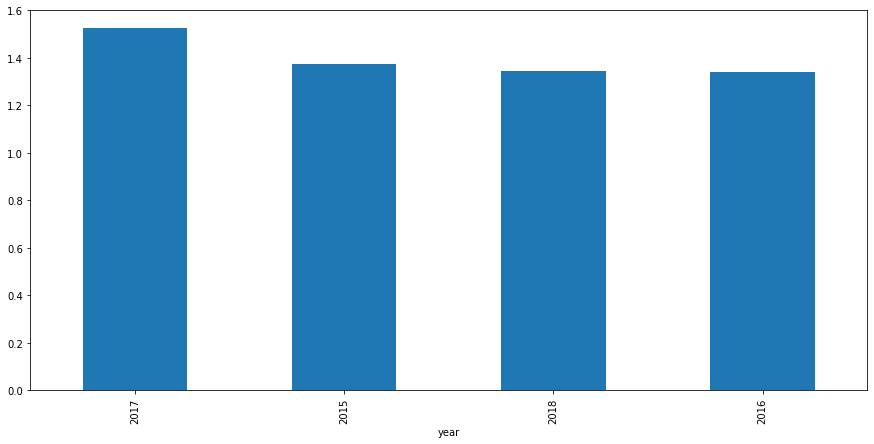

In [ ]:
catColumn=["type","region","year"]
for col in catColumn:
  fig=plt.figure(figsize=[15,7])
  data.groupby(col)["AveragePrice"].mean().sort_values(ascending=False).plot.bar()



### **Correlation Matrix**

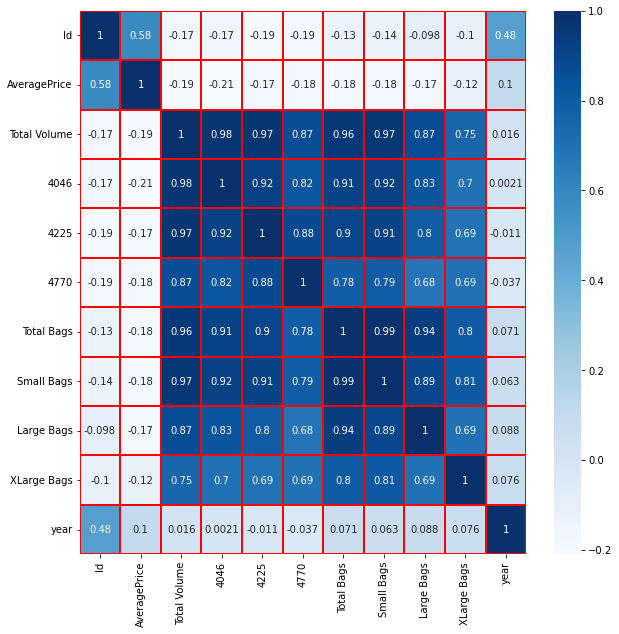

In [ ]:
figure=plt.figure(figsize=[10,10])
sns.heatmap(data.corr(), cmap="Blues", annot=True,linecolor='Red',linewidth=1)

# **7. Data Post-Processing**

### **7.1 Data Preparation/Feature Selection**



In [ ]:
contColumn

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']

In [ ]:
catColumn

['type', 'region', 'year']

In [ ]:
features=['4046','4225','4770','Small Bags','Large Bags', 'XLarge Bags','type','region','year']
features

['4046',
 '4225',
 '4770',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'region',
 'year']

In [ ]:
X=data[features]
y=data.AveragePrice
dataValidation=dataValidation[features]


# **8. Model Development & Evaluation**

### **With PipeLine**

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score,cross_validate,cross_val_predict,KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder

columns_to_encode=['type', 'region']
columns_to_scale=['4046','4225','4770','Small Bags','Large Bags', 'XLarge Bags','year']

max_depth=7
modelList=[LinearRegression(),DecisionTreeRegressor(max_depth=max_depth),
           RandomForestRegressor(random_state=47,max_depth=max_depth),KNeighborsRegressor(n_neighbors=11)]


# columns_to_scale=contColumn
kf=KFold(10,shuffle=True,random_state=47)
# Instantiate column transformer
column_trans=make_column_transformer((OneHotEncoder(drop="first"),columns_to_encode),(RobustScaler(),columns_to_scale),remainder="passthrough")

cv_score_df=pd.DataFrame(columns=["Model","Train Score","Test Score","FitDiff"])
  # print(cv_score_df)
i=0
for model in modelList:
  pipe=make_pipeline(column_trans,model)
  cv_score=cross_validate(pipe,X,y,cv=kf,n_jobs=-1,scoring=("r2"),return_train_score=True)
  cv_score_df.loc[i]=[model,cv_score["train_score"].mean(),cv_score["test_score"].mean(),cv_score["train_score"].mean()-cv_score["test_score"].mean()]
  i=i+1
print(cv_score_df)
# pipe=make_pipeline(column_trans,modelList[2])
# pipe.fit(X,y)



                                               Model  Train Score  Test Score  \
0                                 LinearRegression()     0.560229    0.555686   
1                 DecisionTreeRegressor(max_depth=7)     0.652349    0.620258   
2  RandomForestRegressor(max_depth=7, random_stat...     0.693241    0.667155   
3                KNeighborsRegressor(n_neighbors=11)     0.813408    0.767768   

    FitDiff  
0  0.004544  
1  0.032092  
2  0.026086  
3  0.045640  


In [ ]:
cv_score_df.drop(cv_score_df.index,inplace=True) 
for num in [5,7,9,11,13,15,17,21]:
  pipe=make_pipeline(column_trans,KNeighborsRegressor(n_neighbors=num))
  cv_score=cross_validate(pipe,X,y,cv=kf,n_jobs=-1,scoring=("r2"),return_train_score=True)
  cv_score_df.loc[i]=[num,cv_score["train_score"].mean(),cv_score["test_score"].mean(),cv_score["train_score"].mean()-cv_score["test_score"].mean()]
  i=i+1
print(cv_score_df)


    Model  Train Score  Test Score   FitDiff
11    5.0     0.872222    0.796458  0.075764
12    7.0     0.848964    0.788844  0.060120
13    9.0     0.829898    0.778995  0.050903
14   11.0     0.813408    0.767768  0.045640
15   13.0     0.798423    0.757508  0.040914
16   15.0     0.784617    0.746992  0.037625
17   17.0     0.771846    0.737099  0.034747
18   21.0     0.748185    0.717131  0.031054


# **9. Dump Model using Pickle**

In [42]:
import pickle
pipe=make_pipeline(column_trans,KNeighborsRegressor(n_neighbors=9))
pipe.fit(X,y)
##dump the model into a file
with open("/content/drive/MyDrive/Colab Notebooks/ModelBin/avacado.pkl", 'wb') as f_out:
    pickle.dump(pipe, f_out) # write final_model in .bin file
    f_out.close()  # close the file 

# **10. Load Model using Pickle and Predict Output**

In [43]:
##loading the model from the saved file
with open('/content/drive/MyDrive/Colab Notebooks/ModelBin/avacado.pkl', 'rb') as f_in:
    model = pickle.load(f_in)

##Predict
dataValidation_pred=model.predict(dataValidation)
print(dataValidation_pred)

submission = pd.DataFrame({'Id':dataValidationId,'Drug':dataValidation_pred})
from google.colab import files
submission.to_csv('submission.csv', encoding = 'utf-8-sig',index=False,header=False) 
files.download('submission.csv')

[1.23       1.81555556 1.05666667 ... 1.20111111 1.36888889 1.51444444]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>